In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy
import glob
import numpy as np
import pandas as pd

In [2]:
eyePaths = glob.glob("D:\Dataset\De_id_sample_data\Sample_data2\*",recursive=True)
eyePaths

['D:\\Dataset\\De_id_sample_data\\Sample_data2\\front',
 'D:\\Dataset\\De_id_sample_data\\Sample_data2\\side',
 'D:\\Dataset\\De_id_sample_data\\Sample_data2\\smile']

In [58]:
#original img size (5184 * 3456)

frontPaths = glob.glob(eyePaths[0] + "\*.jpg")
sidePaths = glob.glob(eyePaths[1] + "\*.jpg")
smilePaths = glob.glob(eyePaths[2] + "\*.jpg")

In [60]:
def frontMouseParams(event, x,y, flag, params):
    global lx,ly,rx,ry
    if event ==cv2.EVENT_LBUTTONUP:
        lx = x
        ly = y 
        print(lx,ly)
    if event == cv2.EVENT_RBUTTONUP:
        rx = x
        ry = y
        print(rx,ry)

In [61]:
winName = "imgs"
kernel = np.ones([10,10])
df = pd.DataFrame(columns=['idx','paths','fileName','Left X','Left Y','Right X','Right Y'])
for i in range(len(smilePaths)):
    esc = False
    img = cv2.imread(smilePaths[i])
    print(smilePaths[i].split("\\")[-1])
    cv2.namedWindow(winName)
    # resize img form (5184 * 3456)  --> to (518 * 345)
    resizedImg = cv2.resize(img,(518*2,345*2))
    cv2.setMouseCallback(winName,frontMouseParams)
    
    
    cv2.imshow(winName,resizedImg)
    while(1):
        key = cv2.waitKey()
        
        # when ESC Pressed
        if key ==27:
            cv2.destroyAllWindows()
            esc = True
            break
        elif key == 32:
            #df.loc[i,'paths'] = frontPaths[i]
            df.loc[i,'paths'] = i
            df.loc[i,'fileName'] = smilePaths[i].split("\\")[-1]
            df.loc[i,'Left X'] = lx
            df.loc[i,'Left Y'] = ly
            df.loc[i,'Right X'] = rx
            df.loc[i,'Right Y'] = ry
            cv2.destroyAllWindows()
            break
    #         grayImg = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
    #         dilImg = cv2.dilate(grayImg, kernel)
    #         eroImg = cv2.erode(dilImg, kernel)
    #         ret, otsuImg = cv2.threshold(eroImg, 70, 255, cv2.THRESH_BINARY)
    #         cv2.imshow("closing img",otsuImg)
    
        else :
            continue
    if esc == True:
        break        
# print(df)
print("save scv file...")
df.to_csv('.\\smileEyeLoc.csv',sep=',')

IMG_6683.JPG
442 319
553 319
IMG_6686.JPG
449 294
574 293
IMG_6689.JPG
447 307
557 307
IMG_6692.JPG
435 282
548 281
IMG_6695.JPG
450 298
561 304
IMG_6698.JPG
445 309
562 306
IMG_6701.JPG
447 282
558 279
IMG_6704.JPG
465 294
565 297
IMG_6707.JPG
458 281
565 284
IMG_6710.JPG
452 291
561 295
IMG_6713.JPG
456 297
568 295
IMG_6716.JPG
443 290
561 289
IMG_6719.JPG
IMG_6722.JPG
466 277
561 280
IMG_6725.JPG
458 289
562 289
IMG_6728.JPG
452 376
564 378
IMG_6731.JPG
453 312
568 308
IMG_6734.JPG
451 322
566 323
IMG_6737.JPG
460 320
565 323
IMG_6740.JPG
447 329
554 323
IMG_6743.JPG
448 304
567 315
IMG_6746.JPG
441 322
562 325
IMG_6749.JPG
452 310
563 311
IMG_6752.JPG
426 326
555 316
IMG_6755.JPG
445 311
559 314
IMG_6758.JPG
447 303
561 302
IMG_6761.JPG
439 278
567 275
IMG_6764.JPG
450 298
567 297
IMG_6767.JPG
453 296
572 298
IMG_6770.JPG
456 287
570 282
IMG_6774.JPG
458 272
563 269
IMG_6776.JPG
446 285
561 279
IMG_6779.JPG
463 317
569 325
IMG_6782.JPG
456 330
566 332
IMG_6785.JPG
453 282
584 288
I

In [12]:
# Data augmentation
label = glob.glob("*.csv")
oriData = pd.read_csv(label[0])
oriData.head()

,Unnamed: 0,paths,fileName,Left X,Left Y,Right X,Right Y
0,0,0,IMG_6682.JPG,447,302,555,302
1,1,1,IMG_6685.JPG,451,292,574,289
2,2,2,IMG_6688.JPG,452,301,560,301
3,3,3,IMG_6691.JPG,442,273,550,274
4,4,4,IMG_6694.JPG,445,285,556,285


In [44]:
revData = pd.DataFrame(columns=['idx','paths','fileName','Left X','Left Y','Right X','Right Y'])
revData["Left X"] = oriData["Right X"]
revData["Left Y"] = oriData["Right Y"]
revData["Right X"] = oriData["Left X"]
revData["Right Y"] = oriData["Left Y"]

In [45]:
revPathList=[]
for path in oriData["fileName"] : 
    revPath = path + "_R"
    revPathList.append(revPath)

In [46]:
revData['fileName'] = revPathList

In [56]:
objs = [oriData,revData]
fullSet = pd.concat(objs,ignore_index=True)

C:\Users\mmmil\AppData\Local\Continuum\miniconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [55]:
fullSet.head()

,Left X,Left Y,Right X,Right Y,Unnamed: 0,fileName,idx,paths
0,447,302,555,302,0.0,IMG_6682.JPG,NaN,0
1,451,292,574,289,1.0,IMG_6685.JPG,NaN,1
2,452,301,560,301,2.0,IMG_6688.JPG,NaN,2
3,442,273,550,274,3.0,IMG_6691.JPG,NaN,3
4,445,285,556,285,4.0,IMG_6694.JPG,NaN,4


# mask

In [ ]:
img = cv2.imread(frontPaths[3])
img0 = img[:,:,::-1]
kernel = np.ones([10,10])

resizedImg = cv2.resize(img0,(518*2,345*2))
plt.figure(figsize=(30,10))
plt.subplot(241)
plt.imshow(resizedImg)

img1 = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
plt.subplot(242)
plt.imshow(img1,cmap="gray")

img2 = cv2.dilate(img1, kernel)
plt.subplot(243)
plt.imshow(img2,cmap="gray")

img3 = cv2.erode(img2, kernel)
plt.subplot(244)
plt.imshow(img3,cmap="gray")

ret, img4 = cv2.threshold(img3, 70, 255, cv2.THRESH_BINARY)
plt.subplot(245)
plt.imshow(img4,cmap="gray")

In [78]:
len(img4[1])

1036

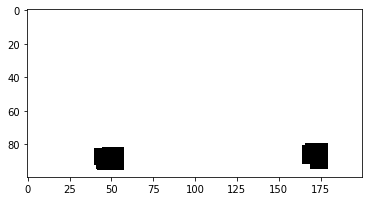

In [64]:
part = img4[200:300,400:600]
plt.imshow(part,cmap='gray')

In [ ]:
winName = "imgs"
kernel = np.ones([10,10])
df = pd.DataFrame(columns=['paths','fileName','Left X','Left Y','Right X','Right Y'])
for i in range(frontPaths):
    esc = False
    img = cv2.imread(frontPaths[i])
    cv2.namedWindow(winName)
    # resize img form (5184 * 3456)  --> to (518 * 345)
    resizedImg = cv2.resize(img,(518*2,345*2))
    cv2.setMouseCallback(winName,frontMouseParams)
    
    
    cv2.imshow(winName,resizedImg)
    while(1):
        key = cv2.waitKey()
        if esc == True:
            break
            
        # when ESC Pressed
        if key ==27:
            cv2.destroyAllWindows()
            esc = True
            break
        elif key == 32:
            grayImg = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
            dilImg = cv2.dilate(grayImg, kernel)
            eroImg = cv2.erode(dilImg, kernel)
            ret, otsuImg = cv2.threshold(eroImg, 70, 255, cv2.THRESH_BINARY)
            cv2.imshow("closing img",otsuImg)
            cv2.destroyAllWindows()
            break

    
        else :
            continue
            
print(df)